<a href="https://colab.research.google.com/github/Azferkhann/-Cricket-Score-Prediction-Data-Preprocessing-ML-Analysis-/blob/main/PDC__ASSIGNMENT_1__AZFARKHAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **NAME :  AZFAR KHAN**
## **ROLLNO : 2021F-BCS-315(E)**
### **ASSIGNMENT NO : 01**
#### **PARALLEL AND DISTRIBUTIVE COMPUTING **

# (1) Abstract
This project presents a deep learning-based image classification system designed to recognize and categorize Pokémon characters using convolutional neural networks (CNNs), with a specific focus on GPU utilization in Python. As the volume of image-based datasets increases and the demand for accurate classification grows, deep learning models like VGG16 have demonstrated significant performance improvements over traditional methods. By leveraging GPU acceleration, we can speed up training time and handle larger datasets effectively. In this assignment, we employed a publicly available Pokémon dataset consisting of images and corresponding labels. The images were preprocessed, filtered, and then fed into a VGG16-based deep learning model, fine-tuned for multiclass classification. The dataset was split automatically using an 70/15/15 (train/validation/test) strategy to ensure a balanced representation across all phases. Data generators were utilized for preprocessing and augmentation. Our model was compiled using the Adam optimizer and categorical cross-entropy loss function. After training, the model was evaluated using metrics like accuracy, precision, recall, F1-score, confusion matrix, and ROC curves. Visualization tools such as matplotlib and seaborn were applied to create training/validation graphs and confusion matrices for better interpretability. The final results demonstrated reliable classification performance across multiple Pokémon classes, confirming that our approach is suitable for real-time classification tasks involving similar image datasets. This project illustrates the potential of using GPU-accelerated deep learning architectures for fast and efficient image recognition tasks.

# **2. Dataset Detail
The dataset used in this project comprises image data of various Pokémon characters and a metadata file (pokemon.csv) containing class labels. Each row in the CSV file represents a Pokémon image, with columns specifying the name (used to reference the image file) and its type (used as the class label). The dataset includes numerous Pokémon types such as Water, Fire, Grass, etc. However, for robust classification and balanced data splits, only classes with at least five instances were retained. This step ensured that the dataset remained compatible with stratified training and validation. Images are stored in .png format and are standardized to 224x224 resolution using TensorFlow’s image preprocessing tools. The dataset directory was structured to separate images and metadata, allowing us to dynamically split data using train_test_split. As part of preprocessing, file names were adjusted to ensure each image was properly mapped to its corresponding label in the CSV file. This dataset offers rich variety in terms of visual features and provides a solid foundation for applying deep learning-based classification tasks. The class imbalance, although present in raw form, was managed by filtering and stratification to ensure fair model training. With over a dozen valid Pokémon categories remaining after filtering, the dataset is both diverse and manageable, making it ideal for training VGG16 on a GPU setup.

In [ ]:
!unzip /content/archive\ \(1\).zip -d /content/

Archive:  /content/archive (1).zip
  inflating: /content/images/abomasnow.png  
  inflating: /content/images/abra.png  
  inflating: /content/images/absol.png  
  inflating: /content/images/accelgor.png  
  inflating: /content/images/aegislash-blade.png  
  inflating: /content/images/aerodactyl.png  
  inflating: /content/images/aggron.png  
  inflating: /content/images/aipom.png  
  inflating: /content/images/alakazam.png  
  inflating: /content/images/alomomola.png  
  inflating: /content/images/altaria.png  
  inflating: /content/images/amaura.png  
  inflating: /content/images/ambipom.png  
  inflating: /content/images/amoonguss.png  
  inflating: /content/images/ampharos.png  
  inflating: /content/images/anorith.png  
  inflating: /content/images/araquanid.png  
  inflating: /content/images/arbok.png  
  inflating: /content/images/arcanine.png  
  inflating: /content/images/arceus.png  
  inflating: /content/images/archen.png  
  inflating: /content/images/archeops.png  
  inflat

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/DeepLerarningProject/archive\ \(1\).zip -d /content/drive/MyDrive/DeepLerarningProject/


unzip:  cannot find or open /content/drive/MyDrive/DeepLerarningProject/archive (1).zip, /content/drive/MyDrive/DeepLerarningProject/archive (1).zip.zip or /content/drive/MyDrive/DeepLerarningProject/archive (1).zip.ZIP.


In [ ]:
image_dir = "/content/images"
csv_file = "/content/pokemon.csv"

In [ ]:
image_dir = "/content/drive/MyDrive/DeepLerarningProject/images"
csv_file = "/content/drive/MyDrive/DeepLerarningProject/pokemon.csv"

In [ ]:
!pip install tensorflow pandas numpy matplotlib seaborn

In [ ]:
import pandas as pd

csv_file = "/content/pokemon.csv"
df = pd.read_csv(csv_file)
print("Column names:", df.columns.tolist())
print("First few rows:\n", df.head())

Column names: ['Name', 'Type1', 'Type2', 'Evolution']
First few rows:
          Name  Type1   Type2   Evolution
0   bulbasaur  Grass  Poison     ivysaur
1     ivysaur  Grass  Poison    venusaur
2    venusaur  Grass  Poison         NaN
3  charmander   Fire     NaN  charmeleon
4  charmeleon   Fire     NaN   charizard


In [ ]:
df = pd.read_csv(csv_file)
# Select only the relevant columns
df = df[['Name', 'Type1']]  # Adjust based on actual column names
df.columns = ['filename', 'label']

In [ ]:
df = pd.read_csv(csv_file)
df.columns = ['filename', 'label'] + [f'col_{i}' for i in range(2, len(df.columns))]

In [ ]:
df['filename'] = df['filename'].apply(lambda x: x + '.jpg')  # Adjust '.jpg' to match your image format

In [ ]:
!ls /content/images | head

abomasnow.png
abra.png
absol.png
accelgor.png
aegislash-blade.png
aerodactyl.png
aggron.png
aipom.png
alakazam.png
alomomola.png


In [ ]:
print(df['filename'].head())

0     bulbasaur.jpg
1       ivysaur.jpg
2      venusaur.jpg
3    charmander.jpg
4    charmeleon.jpg
Name: filename, dtype: object


In [ ]:
image_dir = "/content/images/pokemon"

In [ ]:
!ls /content/
!ls /content/images | head

'archive (1).zip'   drive   images   pokemon.csv   sample_data
abomasnow.png
abra.png
absol.png
accelgor.png
aegislash-blade.png
aerodactyl.png
aggron.png
aipom.png
alakazam.png
alomomola.png


In [ ]:
df['filename'] = df['filename'].apply(lambda x: f"001_{x}.png")  # Adjust based on actual format

Column names: ['Name', 'Type1', 'Type2', 'Evolution']
First few rows:
          Name  Type1   Type2   Evolution
0   bulbasaur  Grass  Poison     ivysaur
1     ivysaur  Grass  Poison    venusaur
2    venusaur  Grass  Poison         NaN
3  charmander   Fire     NaN  charmeleon
4  charmeleon   Fire     NaN   charizard
Class distribution before filtering:
 label
Water       114
Normal      105
Grass        78
Bug          72
Fire         53
Psychic      53
Rock         46
Electric     40
Poison       34
Ground       32
Dark         29
Fighting     29
Dragon       27
Ghost        27
Steel        26
Ice          23
Fairy        18
Flying        3
Name: count, dtype: int64
Class distribution after filtering:
 label
Water       114
Normal      105
Grass        78
Bug          72
Fire         53
Psychic      53
Rock         46
Electric     40
Poison       34
Ground       32
Fighting     29
Dark         29
Ghost        27
Dragon       27
Steel        26
Ice          23
Fairy        18
Name: coun

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 443s 25s/step - accuracy: 0.1036 - loss: 4.2052 - val_accuracy: 0.1240 - val_loss: 2.7749
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 423s 24s/step - accuracy: 0.1032 - loss: 2.7496 - val_accuracy: 0.1570 - val_loss: 2.7243
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 421s 24s/step - accuracy: 0.1538 - loss: 2.6911 - val_accuracy: 0.1818 - val_loss: 2.6966
Epoch 4/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 424s 24s/step - accuracy: 0.1943 - loss: 2.5972 - val_accuracy: 0.2314 - val_loss: 2.5819
Epoch 5/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 420s 24s/step - accuracy: 0.2007 - loss: 2.4760 - val_accuracy: 0.2645 - val_loss: 2.5789


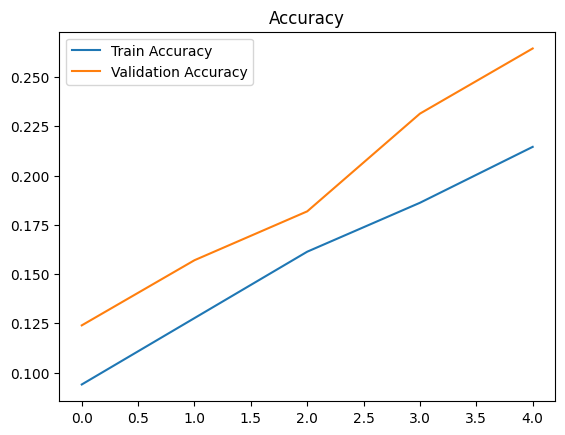

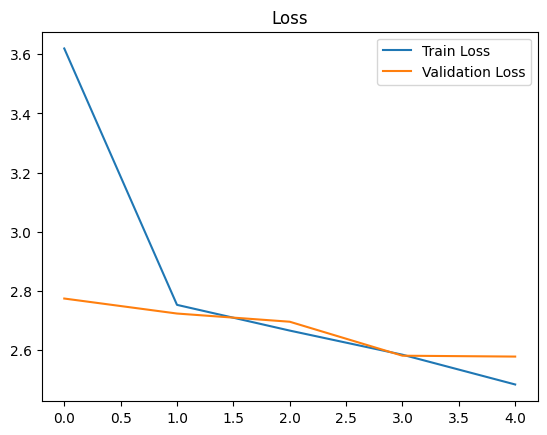

4/4 ━━━━━━━━━━━━━━━━━━━━ 75s 18s/step

Classification Report:

              precision    recall  f1-score   support

         Bug       0.00      0.00      0.00        11
        Dark       0.00      0.00      0.00         5
      Dragon       0.00      0.00      0.00         4
    Electric       0.00      0.00      0.00         6
       Fairy       0.00      0.00      0.00         2
    Fighting       0.00      0.00      0.00         4
        Fire       0.11      0.12      0.12         8
       Ghost       0.00      0.00      0.00         4
       Grass       0.22      0.92      0.36        12
      Ground       0.00      0.00      0.00         5
         Ice       0.00      0.00      0.00         3
      Normal       0.22      0.25      0.24        16
      Poison       0.00      0.00      0.00         5
     Psychic       0.00      0.00      0.00         8
        Rock       0.00      0.00      0.00         7
       Steel       0.00      0.00      0.00         4
       Water      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


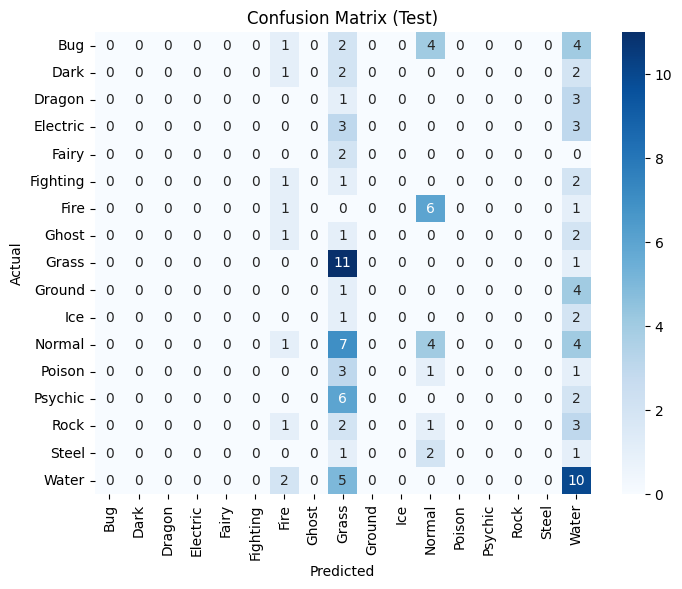

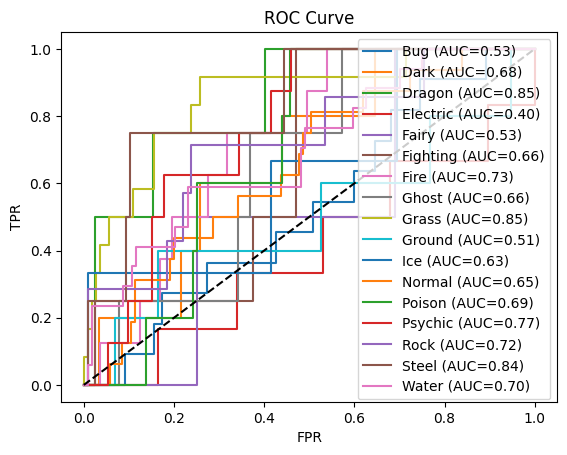

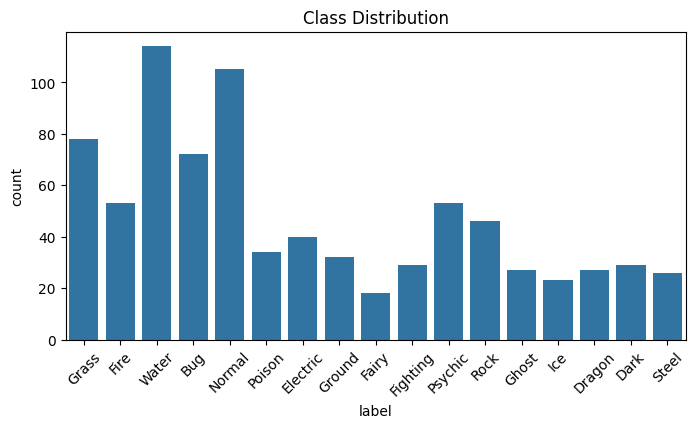

In [ ]:
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from google.colab import drive

# Mount Google Drive (commented out since files are in /content/)
# drive.mount('/content/drive')

# Set dataset path
image_dir = "/content/images"  # Update if images are in a subdirectory, e.g., "/content/images/pokemon"
csv_file = "/content/pokemon.csv"

# Load CSV
df = pd.read_csv(csv_file)
print("Column names:", df.columns.tolist())  # Debug: Check column names
print("First few rows:\n", df.head())       # Debug: Check data

# Select relevant columns and rename
df = df[['Name', 'Type1']]  # Use 'Name' for filename, 'Type1' for label
df.columns = ['filename', 'label']  # Rename to 'filename' and 'label'
print("Class distribution before filtering:\n", df['label'].value_counts())

# Filter out classes with fewer than 5 samples to avoid stratification issues
min_samples = 5
class_counts = df['label'].value_counts()
valid_classes = class_counts[class_counts >= min_samples].index
df = df[df['label'].isin(valid_classes)]
print("Class distribution after filtering:\n", df['label'].value_counts())

# Append file extension (adjust based on actual image extensions)
df['filename'] = df['filename'].apply(lambda x: x + '.png')  # Changed to .png; adjust if needed
# If images have prefixes like "001_", uncomment and adjust the next line
# df['filename'] = df['filename'].apply(lambda x: f"001_{x}.png")  # Example for prefixed filenames

# Debug: Check filenames and image directory
print("Sample filenames in DataFrame:\n", df['filename'].head())
print("Sample files in image directory:\n")
!ls /content/images | head
print("Total images in directory:\n")
!ls /content/images | wc -l

# Split data
train_df, temp_df = train_test_split(df, test_size=0.3, stratify=df['label'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['label'], random_state=42)

print("Data Split Summary:")
print("Training:", len(train_df), "Validation:", len(val_df), "Testing:", len(test_df))
print("Training class distribution:\n", train_df['label'].value_counts())
print("Validation class distribution:\n", val_df['label'].value_counts())
print("Testing class distribution:\n", test_df['label'].value_counts())

# ImageDataGenerators
datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_dataframe(train_df, image_dir, x_col='filename', y_col='label',
    target_size=(224, 224), batch_size=32, class_mode='categorical')
val_gen = datagen.flow_from_dataframe(val_df, image_dir, x_col='filename', y_col='label',
    target_size=(224, 224), batch_size=32, class_mode='categorical')
test_gen = datagen.flow_from_dataframe(test_df, image_dir, x_col='filename', y_col='label',
    target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=False)

# Check if generators found images
print(f"Training images found: {train_gen.samples}")
print(f"Validation images found: {val_gen.samples}")
print(f"Test images found: {test_gen.samples}")

# Stop if no images were found
if train_gen.samples == 0 or val_gen.samples == 0 or test_gen.samples == 0:
    raise ValueError("No images found in one or more generators. Check filenames and image_dir.")

# Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_gen.class_indices), activation='softmax')
])
base_model.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(train_gen, validation_data=val_gen, epochs=5)

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy")
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss")
plt.legend()
plt.show()

# Predictions
test_gen.reset()
preds = model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)
y_true = test_gen.classes
labels = list(test_gen.class_indices.keys())

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title("Confusion Matrix (Test)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
from sklearn.preprocessing import label_binarize
y_true_bin = label_binarize(y_true, classes=range(len(labels)))
fpr, tpr, roc_auc = {}, {}, {}

for i in range(len(labels)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], preds[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(len(labels)):
    plt.plot(fpr[i], tpr[i], label=f"{labels[i]} (AUC={roc_auc[i]:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

# Class Distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='label')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()

In [ ]:
print("Sample filenames in DataFrame:\n", df['filename'].head())
!ls /content/images | head

Sample filenames in DataFrame:
 0     bulbasaur.png
1       ivysaur.png
2      venusaur.png
3    charmander.png
4    charmeleon.png
Name: filename, dtype: object
abomasnow.png
abra.png
absol.png
accelgor.png
aegislash-blade.png
aerodactyl.png
aggron.png
aipom.png
alakazam.png
alomomola.png


In [ ]:
print("Sample filenames in DataFrame:\n", df['filename'].head())
!ls /content/images | head
!ls /content/images | wc -l

Sample filenames in DataFrame:
 0     bulbasaur.png
1       ivysaur.png
2      venusaur.png
3    charmander.png
4    charmeleon.png
Name: filename, dtype: object
abomasnow.png
abra.png
absol.png
accelgor.png
aegislash-blade.png
aerodactyl.png
aggron.png
aipom.png
alakazam.png
alomomola.png
809
